# Machine-Learning Based Natural Language Processing
# Lab 1 - Text Processing and Document Classification

---
In this session, we will teach you how to approach processing a text-based dataset, with the goal of training a classifier, based on classical machine learning techniques. We've chosen __stance detection__ as an example of a document classification task.

We will perform some preprocessing on data, see how to transform textual data into feature vectors, how to train several algorithms, as well as how to evaluate the trained models.  We will make use of the sklearn machine learning library in Python. 

These are the topics we will cover:
 * Data Exploration
 * Text processing
 * Feature Extraction
 * Classification Models
 * Evaluation
 * Regularization
 * Kaggle competition (*)

(\*) As a **bonus**, we'll have a friendly Kaggle competition to see who can get the highest performance for stance prediction on a held out test set. We want you to critically think about how to improve and generalize your model's performance!


## General instructions:
- Complete the code where needed
- Provide answers to questions only in the cell where indicated
- **Do not alter the evaluation cells** (`## evaluation`) in any way as they are needed for the partly automated evaluation process. Please note that some of your outcomes will be dependent on the sklearn version used by your system. We have tested the notebook on Google Colab, so we can only guarantee that the evaluations work as expected on that platform. **Please run the notebook on Google Colab (it's free and easy to use), or otherwise ensure that you have installed identical versions of each package on your own device when running locally.**

---
## Machine Learning in Python

Python is the most widely used programming language among data scientists and machine learning engineers, next to R, Matlab and SQL (although the latter is not a programming language in the strict sense). It is very readable and development times are usually quite fast, which makes it the perfect language to do rapid prototyping and to toy around with your ideas. It has also become an entire ecosystem on its own among data scientists: a plethora of GitHub data science repositories exist, which you can use in your own projects; if you have some data science problem, chances are people have already worked on it in the past and have open-sourced their code. And finally, Python is the language of choice if you want to experiment with deep learning -- the latest 'big leap' in machine learning -- since the most mature and most widely used frameworks (PyTorch, Tensorflow and Keras) provide very easy-to-use Python interfaces.

In this lab session, we will explore Python for natural language processing tasks, more specifically text processing and classification. We will focus on libraries often used for text processing and machine learning tasks, such as Pandas, Scikit-learn and the Natural Language Toolkit (NLTK). 

<center> 
<img src="https://www.dropbox.com/s/vejqgrjfaoa5o3w/scikit-learn-logo.png?dl=1" style="max-width: 120px; display: inline" />
<img src="https://www.dropbox.com/s/3bshsaj5bzutf0m/numpy-logo.png?dl=1" style="max-width: 120px; display: inline" />
<img src="https://www.dropbox.com/s/k89x8s0b7k5xacz/scipy-logo.png?dl=1" style="max-width: 120px; display: inline" />
<img src="http://localhost:8888/static/base/images/logo.png" style="max-width: 120px; display: inline" />
<img src="https://www.dropbox.com/s/xz09xye8svlh5fw/matplotlib-logo.png?dl=1" style="max-width: 120px; display: inline"/>
<img src="https://www.dropbox.com/s/ubkr0bjx4mp70a9/pandas-logo.png?dl=1" style="max-width: 120px; display: inline" />
</center>

### Scikit-Learn

* Machine learning library written in __Python__
* __Simple and efficient__, for both experts and non-experts
* Classical, __well-established machine learning algorithms__
* Shipped with <a href="https://scikit-learn.org/stable/user_guide.html">documentation</a> and <a href="https://scikit-learn.org/stable/auto_examples/index.html">examples</a>

### Pandas

* Pandas is a library for __data manipulation and analysis__.
* Pandas is designed to make it easier to work with structured data. Most of the analyses you might perform will likely involve using __tabular data__, e.g., from .csv files or relational databases (e.g., SQL). 
* A key class in pandas is the `DataFrame`, a two-dimensional tabular, column-oriented data structure where an element can be accessed by providing both its row and column label.
* Documentation, guides and examples can be found <a href="https://pandas.pydata.org/docs/index.html">here</a>

**Remark**: this lab session is self-paced, and we hugely encourage that you go out on the internet and become big friends with _Google_ and _StackOverflow_. No one has complete knowledge of the entire Python core, let alone knowing the most efficient methods to achieve a certain result. If you have a basic Python problem (e.g., "how would I initialize a list of all zeros with a given length?") you will definitely and easily find multiple answers on the internet.

In [ ]:
# if necessary, install the needed packages by uncommenting the following lines:
# ! conda install numpy scipy scikit-learn jupyter matplotlib  -y
# ! conda install python-graphviz -y
# ! pip install pydotplus

import warnings
warnings.filterwarnings('ignore')

# Data processing
import pandas as pd
import numpy as np

# General machine Learning
import sklearn

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For reproducability
SEED = 42

---
## Stance Detection

Stance detection is the extraction of a subject's reaction to a claim made by a primary actor. 
In the context of this task, we define stance detection as automatically determining from text whether the author is in favor of the given target, against the given target, or whether neither inference is likely. Consider the target--tweet pair:


```
Target: legalization of abortion
Tweet: A foetus has rights too! Make your voice heard.
```

Humans can deduce from the tweet that the speaker is likely against the targetted claim. The aim of the task is to test automatic systems in determining whether we can deduce the stance of the tweeter. 

Stance detection plays a major role in analytical studies measuring public opinion on social media, particularly on political and social issues. The nature of these issues is usually controversial, wherein people express opposing opinions toward
differentiable points.

We will analyze Dutch tweets as collected by the website [twiqs.nl](https://twiqs.nl) (Tjong Kim Sang and van den Bosch 2013) from the period from March 12th, 2020 (the date of the first Dutch national pandemic press conference) to March 31st, 2021. This data set contains about 20 million tweets per month of which about 13% are pandemic tweets, extracted by a hand-crafted query containing 67 tokens like corona, vaccine, pandemic, curfew and patient (Tjong Kim Sang et al. 2021). In this exercise we will determine the stance of users on the measure of social distancing against COVID-19.

<img src="https://gitlab.ilabt.imec.be/T2K/ugainbigdata_public/-/raw/master/img//stance.png" width=100% >

Three different labels can be assigned to a tweet: *__Support (EENS)__*, if the tweet author supports the related pandemic measure, *__Reject (ONEENS)__*, if the tweet author rejects the measure, and *__Irrelevant (ANDERS)__*, if a tweet is not relevant for the measure or if the opinion of the sender could not be determined. 
A subset of the social distancing tweets (898) was annotated by a second annotator. The inter-annotator agreement or Cohen Kappa coefficient was κ = 0.55 which indicates that labeling was a hard task (for more information on the Cohen Kappa metric we refer to its page [Wikipedia](https://en.wikipedia.org/wiki/Cohen%27s_kappa)).

The described dataset has been provided in CSV format. Pandas will now be used to read the dataset into memory. 

In [ ]:
!wget "https://www.dropbox.com/s/brhwpht2tynabnu/data.zip?dl=1" -O data.zip
!unzip -o data.zip
!rm data.zip

--2022-03-15 22:13:42--  https://www.dropbox.com/s/brhwpht2tynabnu/data.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/brhwpht2tynabnu/data.zip [following]
--2022-03-15 22:13:42--  https://www.dropbox.com/s/dl/brhwpht2tynabnu/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucccd1d81a7272ceed8f8f6bbc8a.dl.dropboxusercontent.com/cd/0/get/Bhi5MHbW0wSPsBrzdhkplGDaWfj_ddve6ifp7lubUjCkrS2uBrIVPXdv5Qfh8k6spCIF_RXMfPdOyn83-kf6QCgQylNwEqQrLcgdBBUW3FkEOrcCws7cyEsM9uVObF6NC_Zil10wM93ej2Jjz11mQbCEsj16dGBqcsJRe6xpBNXUIg/file?dl=1# [following]
--2022-03-15 22:13:42--  https://ucccd1d81a7272ceed8f8f6bbc8a.dl.dropboxusercontent.com/cd/0/get/Bhi5MHbW0wSPsBrzdhkplGDaWfj_ddve6ifp7lubUjCkrS2uBrIVPXdv5Qfh8k6spCIF_RXMfPdOyn

In [ ]:
# load in stance detection dataset
filepath = "train.csv"
data = pd.read_csv(filepath, sep=",")
data.head()

,created_at,id,full_text,entities,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,text,label
0,Wed Mar 11 13:06:38 +0000 2020,1533,@SBrusje @linnas79 @aafkeromeijn @rivm Dan heb...,"{'hashtags': [{'text': 'rivm', 'indices': [181...",False,0.0,1.0,False,False,NaN,NaN,nl,Dan hebben ze de zaak dus gewoon niet goed...,ANDERS
1,Sun Apr 12 16:33:38 +0000 2020,2190,De buren (4 volwassenen) + 3 kids onder hun af...,"{'hashtags': [{'text': 'afstandhouden', 'indic...",False,0.0,3.0,False,False,NaN,NaN,nl,De buren (4 volwassenen) + 3 kids onder hun af...,EENS
2,Wed May 20 15:10:22 +0000 2020,4037,Thierry Baudet pleit voor veel meer maatwerk: ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,0.0,0.0,False,False,False,False,nl,Thierry Baudet pleit voor veel meer maatwerk: ...,ONEENS
3,Fri Apr 24 15:38:13 +0000 2020,362,Samen zorgen we voor een rustig Heuvelland. Bl...,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,3.0,0.0,False,False,NaN,NaN,nl,Samen zorgen we voor een rustig Heuvelland. Bl...,EENS
4,Mon Mar 23 20:33:41 +0000 2020,2253,Alle bijeenkomsten tot 1 juni 2020 zijn verbod...,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,33.0,0.0,False,False,NaN,NaN,nl,Alle bijeenkomsten tot 1 juni 2020 zijn verbod...,EENS


Note that the tweet dataset contains much more information than simply the text of the tweet. While indicators such as the number of retweets or favorites might be useful for stance detection, we will focus on the "text" field itself (since, of course, this is still an NLP course). 

## 1. Data exploration

The first step you should think of when you get your hands on a new dataset, is data exploration. This means getting familiar with all the aspects of the data by solving queries and visualizing its properties. There are many useful Python visualization libraries which can make this task easier, such as <a href="https://matplotlib.org/"> Matplotlib </a> or <a href="https://seaborn.pydata.org/"> Seaborn </a>.

We start with some warm-up questions to help you get familiar with the dataset. Because you're all familiar with Python already, the focus of the lab session will not be on more advanced data exploration and visualization tasks, though you should not underestimate the importance of this step. 

**Question**: How many tweets are included in the collection? 

**Question**: How many different words are used in the tweets? For now, you can assume that all words are separated by a space. Watch out not to count leading or trailing spaces as words. Hint: take a look at the default setting of the "split" function for strings. 

**Question**: How many times do each of the stances occur in the data? Remember that the following labels are used in the dataset: "EENS" (agree), "ONEENS" (disagree), "ANDERS" (neutral).

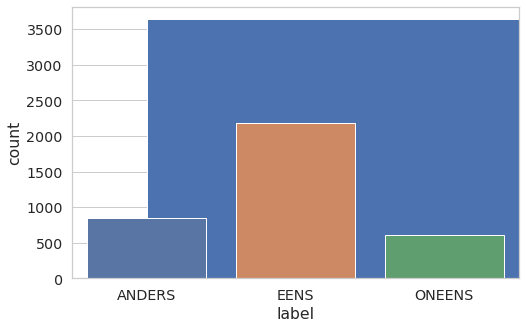

In [ ]:
 n_tweets = (len(data['full_text']))
# n_words = ... (number of different words in the collection)
n_agree , n_neutral,n_disagree = data.value_counts(data.label)

############### for student ################

# import seaborn as sns

# No of tweets
sns.set(style='whitegrid', palette="deep", font_scale=1.3, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data['id'], kde=False, bins=1, hist_kws={"alpha": 1}
).set(xlabel='Tweets', ylabel='Count');

sns.countplot(data['label']);


In [ ]:
# evaluation
## DON'T CHANGE THIS CELL IN ANY WAY

assert n_tweets == 3636, "Number of tweets is not correct"
# assert n_words == 20140, "Number of words in vocabulary is not correct. Please ensure that no whitespaces are counted as words."
assert n_agree == 2181, "Number of stance occurrences is not correct"
assert n_disagree == 604, "Number of stance occurrences is not correct"
assert n_neutral == 851, "Number of stance occurrences is not correct"
print('well done')

well done


As an illustration, below is code to visualize the word frequencies in a word cloud. 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Example text:
     Dan hebben ze de zaak dus gewoon niet goed geregeld, ondanks 1,5 maand voorbereidingstijd. Je ziet hetzelfde incompetente gepruts in Amerika. #rivm

Dutch stopwords:
 aan, al, alles, als, altijd, andere, ben, bij, br, daar, dan, dat, de, der, deze, die, dit, doch, doen, door, dus, een, eens, en, er, ge, geen, geweest, haar, had, heb, hebben, heeft, hem, het, hier, hij, hoe, hun, iemand, iets, ik, in, is, ja, je, kan, kon, kunnen, maar, me, meer, men, met, mij, mijn, moet, na, naar, niet, niets, nog, nu, of, om, omdat, onder, ons, ook, op, over, reeds, te, tegen, toch, toen, tot, u, uit, uw, van, veel, voor, want, waren, was, wat, werd, wezen, wie, wil, worden, wordt, zal, ze, zelf, zich, zij, zijn, zo, zonder, zou

Wordcloud:


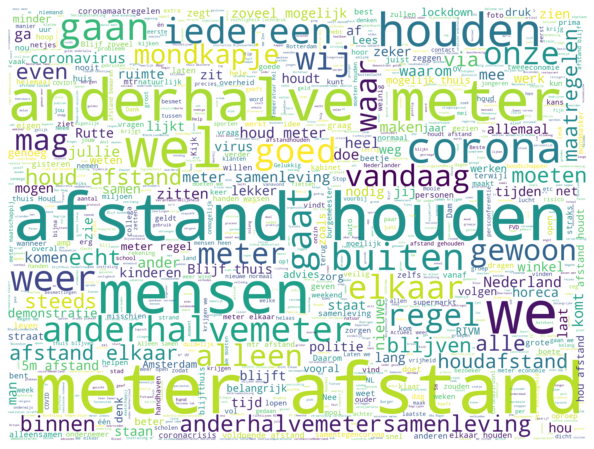

In [ ]:
# Word cloud

# if necessary, install the needed packages by uncommenting the following line:
! pip install wordcloud nltk

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
STOPWORDS = stopwords.words("dutch")

# Store text from pandas data frame in list
text = ' '.join(data['text']) # join all tweets in training set
print('Example text:\n', data['text'][0])

# limit word count
wordcount = 1000
# stop words
stopwords = set(STOPWORDS)
stopwords.add("br")
print('\nDutch stopwords:\n', ', '.join(sorted(list(stopwords))))

# setup word cloud
wc = WordCloud(scale=3, background_color="white", max_words=wordcount, stopwords=stopwords, width=800, height=600)

# generate word cloud
wc.generate(text)

# show
print('\nWordcloud:')
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2. Text processing

In the remainder of the lab session, we will focus on textual data. Performing analytics, business intelligence, machine learning, etc. on (written) text is called Natural Language Processing (NLP) in academics. In the next few exercises we will learn the necessary skills and steps in preparing and transforming text into useful data that can be used in a wide variety of powerful machine learning applications.

### 2.1. Cleaning and preprocessing

The very first step in NLP is _preprocessing_, that is, preparing the raw textual data such that we get rid of (most of the) noise and retain the most informative signal. Consider for example the following tweet, and how we can apply multiple possible preprocessing steps to arrive at a noise-free tweet. __All steps are optional__ and one should always consider the application at hand to determine which preprocessing steps are needed!

> HEY @UGentstudent! This isn't a clean #NLP tweet :-D http://www.ugent.be

__Step 1__ - Convert all characters to lowercase. By doing this, the words _'This'_ and _'this'_ become the same, which is what we want.

> hey @ugentstudent! this isn't a clean #nlp tweet :-d http://www.ugent.be

__Step 2__ - Apply normalization, for example:
 * Replacing all numbers by a single character, e.g. 0.
 * Replacing all characters with accents by their clean counterpart, e.g. é becomes e.
 * Expanding popular contractions such as _"isn't"_ to _"is not"_.
 * ...

> hey @ugentstudent! this is not a clean #nlp tweet :-d http://www.ugent.be

__Step 3__ - Remove unwanted words, punctuation, URLs, whitespaces... For example, we could choose to only retain alphanumerical chatacters, but this always depends on the application at hand. In our case, we will want to keep hashtags and mentions, but remove URLs and emoticons/emojis.

> hey @ugentstudent! this is not a clean #nlp tweet

__Step 4__ - Splitting the text into separate words. This is a process called _tokenization_ and there exist many different methods of tokenizing a text. The most simple method finds all whitespaces and uses them to split the text. More advanced tokenizers also take into account punctuation and other textual markers. We will explore tokenization in detail in the next subsection.

> ['hey', '@ugentstudent!', 'this', 'is', 'not', 'a', 'clean', '#nlp', 'tweet']

__Step 5__ - Remove stop words. These are words that hardly contribute to the meaning of a text, such as "the", "a", "an", "is", "and", "our", etc. There are lists available of common stop words in English (e.g. https://gist.github.com/sebleier/554280) or other languages (which can be imported from the NLTK library https://www.nltk.org/). Some lists include words such as "not", but such words can shape the semantic meaning of a text, so always be careful which words get removed from your text.

> ['hey', '@ugentstudent', 'not', 'clean', '#nlp', 'tweet']

__Step 6__ - In some applications (such a document classification) it can also be useful to apply _stemming_ to the text (https://en.wikipedia.org/wiki/Stemming). Stemming essentially means that words are normalized, such that for example "fishing", "fished" and "fisher" all reduce to the same stem "fish". There exist many stemming algorithms (such as Porter stemming), but we will not cover stemming in detail here. 

We won't go into manual preprocessing and cleaning of tweets in this lab session, since it just comes down to applying some basic Python functions. As we will see later, there exist Python libraries with many options for automatic text cleaning and processing, which are ready for application in your own projects. Usually, there is little need for rewriting the existing functionality and it is just a matter of combining the right settings for your specific problem.

For now, we provide the following function, which receives a tweet's text as an input and outputs the cleaned version.

In [ ]:
import re

punct = {'💁', '[', '’', '~', '💪', '📚', '🏡', '-', '🐣', '🇺', '”', '̶', '\u200a', ';', '🍕', ' ', '!', '%', ',', '👇', '®', '🌈', '?', '🏽', '=', '💨', '✅', '✔', ')', '|', '‘', '\xa0', '🗽', '&', '🏼', '¿', '…', '🎓', '👉', '❌', '🎧', '👈', '🚂', '+', '🤖', '👎', '→', '¡', '🤔', '️', '👸', '@', '🇸', ':', '“', '•', '🏿', '🏻', '👀', '👏', '—', ']', '✓', '"', '\u200b', '🎤', '\n', '.', '(', '$', '❤', '⬇', '#', '👍', "'", '/', '*', '🏾', '–', '👿'}

punct.remove(' ')  # keep spaces
punct.remove('#')  # keep hashtags
punct.remove('@')  # keep mentions
punct.remove('\'') # keep single quotes (in order to retain I'm, isn't, etc.)

def clean(text):
    temp_text = text.lower()
    temp_text = re.sub(r'https?://\S+', '', temp_text)
    temp_text = re.sub(r'\d+', '0', temp_text)
    temp_text = temp_text.replace('’', '\'')  # some single quotes are slanted, and we want to retain them
    for p in punct:
        temp_text = temp_text.replace(p, ' ')
    temp_text = re.sub(r'\s+', ' ', temp_text)
    cleaned_text = temp_text.strip()
    return cleaned_text

In [ ]:
tweet_text = data["text"].iloc[0]
cleaned_tweet = clean(tweet_text)
print("Original tweet: "+ tweet_text)
print("Cleaned tweet: "+cleaned_tweet)

Original tweet:     Dan hebben ze de zaak dus gewoon niet goed geregeld, ondanks 1,5 maand voorbereidingstijd. Je ziet hetzelfde incompetente gepruts in Amerika. #rivm
Cleaned tweet: dan hebben ze de zaak dus gewoon niet goed geregeld ondanks 0 0 maand voorbereidingstijd je ziet hetzelfde incompetente gepruts in amerika #rivm


### 2.2. Tokenization

Tokenization is the process of splitting a text into a sequence of separate words. It is an essential step in NLP, since words are the most basic building blocks that provide a meaning or sentiment to any text. Natural language models therefore often work with words as input features (although in some models the separate characters themselves are used instead of words).

The most basic type of tokenization is to split the text whenever a whitespace occurs, as we did earlier. This usually works pretty well, but one might need some additional functionality. For example, in English, we would like words such as *couldn't* to be expanded to *could* and *not*. A useful tool is Python's Natural Language ToolKit (NLTK library), which contains many methods and algorithms to automatically tokenize a text. For example, it contains a specific Twitter-aware tokenizer. 

**Question**: Write a function that tokenizes the input "tweet_text" using the TweetTokenizer from the tokenizer module (https://www.nltk.org/api/nltk.tokenize.html). The output is a list of tokens extracted from the input tweet (hint: a quick Google-search can provide you with many examples of how this tokenizer is used). 

We have already provided the structure of the function, together with its input and output. Please fill in the part in between. 

In [ ]:
# #import tweet tokenizer from NLTK and tokenize argument 'tweet_text'
# # ...
# # tknzr = ...
# # tweet_tokens = ... 
# import en_core_web_sm
from nltk.tokenize import TweetTokenizer


def tokenize(tweet_text):
  tknzr = TweetTokenizer()
  tweet_tokens = tknzr.tokenize(tweet_text)

  return tweet_tokens


In [ ]:
## evaluation
## DON'T CHANGE THIS CELL IN ANY WAY
tweet_tokens = tokenize(cleaned_tweet)
print(len(tweet_tokens))

assert len(tweet_tokens)==23, "Did you tokenize correctly? Used the TweetTokenizer?"
assert tweet_tokens[4] == "zaak", "Did you tokenize correctly? Used the TweetTokenizer?"
print('well done')

23
well done


One reason to use Python for machine learning (and NLP) is that thousands of fellow computer scientists and researchers are using it as well for that purpose. Chances are that whatever problem you are trying to tackle, someone has done it already. Regarding tweet tokenization, there are numerous GitHub projects to be found that have solved this problem, some better or more user-friendly than others. We have had pretty good experience with the following GitHub repository: https://github.com/erikavaris/tokenizer. 

For now, we will continue using the tweets tokenized with the NLTK TweetTokenizer. The code below adds a column to the original dataframe which contains the cleaned and tokenized version of the tweet text, for each tweet in the dataset. 

In [ ]:
data["cleaned"] = data["text"].apply(clean)
data["tokenized"] = data["cleaned"].apply(tokenize)

In [ ]:
data[["text", "cleaned", "tokenized", "label"]].head()

,text,cleaned,tokenized,label
0,Dan hebben ze de zaak dus gewoon niet goed...,dan hebben ze de zaak dus gewoon niet goed ger...,"[dan, hebben, ze, de, zaak, dus, gewoon, niet,...",ANDERS
1,De buren (4 volwassenen) + 3 kids onder hun af...,de buren 0 volwassenen 0 kids onder hun afdak ...,"[de, buren, 0, volwassenen, 0, kids, onder, hu...",EENS
2,Thierry Baudet pleit voor veel meer maatwerk: ...,thierry baudet pleit voor veel meer maatwerk b...,"[thierry, baudet, pleit, voor, veel, meer, maa...",ONEENS
3,Samen zorgen we voor een rustig Heuvelland. Bl...,samen zorgen we voor een rustig heuvelland bli...,"[samen, zorgen, we, voor, een, rustig, heuvell...",EENS
4,Alle bijeenkomsten tot 1 juni 2020 zijn verbod...,alle bijeenkomsten tot 0 juni 0 zijn verboden ...,"[alle, bijeenkomsten, tot, 0, juni, 0, zijn, v...",EENS


### 2.3. Building a vocabulary

For machine learning models it is important that datapoints have a numerical representation. Many machine learning models are vector-based, and each class of data is assigned to its own dimension in these vectors. What this means for us now, is that each word should be mapped to its own unique positive integer value. For example, consider a dictionary of the entire English language, then each word can be mapped to the position of that word in the dictionary. The sentence _"blijf afstand houden"_ can then be represented as a sequence of indices, e.g. [243, 5, 8723]. In other words, the text is transformed into a mathematical representation, which opens the gate to all sorts of powerful machine learning methods and models, which will be explored in later steps.

We will now manually build a vocabulary for the Twitter dataset. 

**Question:** Use the `set` datastructure to find all unique words in the dataset, thereby using the tokenized tweets. How big is the vocabulary?

In [ ]:
qwe=data['tokenized'].apply(pd.Series).stack()
vocabulary = set(qwe)
print(len(vocabulary))


12200


In [ ]:
## evaluation
## DON'T CHANGE THIS CELL IN ANY WAY

assert type(vocabulary) == set, "Please use a set structure, to ensure every word in the vocabulary is unique"
assert len(vocabulary)==12200, "Size of vocabulary is not correct... Are you sure you used the tokenized tweets?"
print('well done')

well done


**Question:** Now create a dictionary `word_to_ix` which maps a word to a unique index (from 0 up to the length of the vocabulary). Also, create a dictionary `ix_to_word` which does the opposite mapping. **Please ensure that the mapping is done alphabetically, by using the `sorted_vocabulary` (we have defined it for you). If w1 comes before w2 in alphabetical order, w1's index should be lower than w2's index.** Check if you can translate a word to an index, and use that index to find the original word again. What is the theoretical time complexity of a dictionary lookup?

In [ ]:
# create word_to_ix and ix_to_word dictionaries
# word_to_ix = ...
# ix_to_word = ...
from typing import List
import operator
sorted_vocabulary = sorted(vocabulary) # Please ensure that this ordering is translated into the indices in your dictionary
print(type(sorted_vocabulary))
word_to_ix = {k: v for v, k in enumerate(sorted_vocabulary)}
ix_to_word = {v: k for k, v in word_to_ix.items()}
print(word_to_ix)
print(ix_to_word)








############################################

<class 'list'>
{'#': 0, '##persconferentie': 1, '#0g': 2, '#0ice': 3, '#0jaarvrijheid': 4, '#0juni': 5, '#0leerlingen': 6, '#0maart': 7, '#0mafstand': 8, '#0mei': 9, '#0noord': 10, '#0plus': 11, '#0tintengroenassendorp': 12, '#0½meter': 13, '#aalanden': 14, '#aalsmeer': 15, '#aan': 16, '#aandacht': 17, '#aandelen': 18, '#aanhetwoord': 19, '#aanmeldingen': 20, '#aarde': 21, '#aardigonderweg': 22, '#aboutaleb': 23, '#action': 24, '#aerosolen': 25, '#aerosols': 26, '#afhalenenbezorgen': 27, '#afstand': 28, '#afstanden': 29, '#afstandhouden': 30, '#afstandnemen': 31, '#afstandsleren': 32, '#afstandsonderwijs': 33, '#airconditioning': 34, '#ajax': 35, '#albertheijn': 36, '#albertostegeman': 37, '#alblasserdam': 38, '#aldannietgevuldmetkattenpis': 39, '#alib': 40, '#allebordenaanpassen': 41, '#alleensamen': 42, '#alleenwonenden': 43, '#allemaal': 44, '#alllivesmatter': 45, '#alllivesmatters': 46, '#alllivesmattter': 47, '#almelo': 48, '#alseenvogel': 49, '#ambulancezorgrr': 50, '#americana':

In [ ]:
## evaluation
## DON'T CHANGE THIS CELL IN ANY WAY

assert len(word_to_ix) == len(ix_to_word), "Both dictionaries should have the same size"
assert word_to_ix["afstand"] == 1672, "Did you use the sorted vocabulary? Are you working on colab?"
assert ix_to_word[10870] == "virus", "Did you use the sorted vocabulary? Are you working on colab?"

print("well done")

well done


Now that we have our vocabulary, it is possible to do some additional visualization to explore its properties. A more advanced exploration of the vocabulary can be useful to get inspiration for new features or additional processing steps necessary. Data cleaning and tokenization is usually an iterative process, where you will try out some new cleaning steps, visualize or investigate the resulting tokens and work out the additional necessary steps to obtain a clean dataset. For now, we will not go into this any further, and we will leave it at plotting the number of occurrences of words in our vocabulary. 

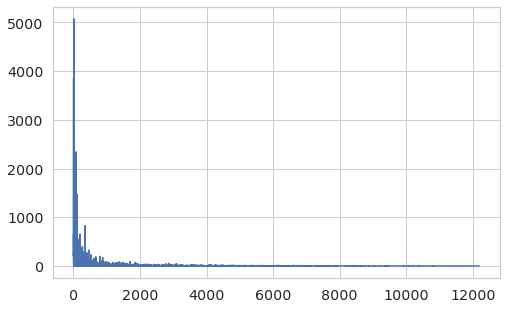

In [ ]:
from collections import Counter

all_tokens = []
for t in data['tokenized']:
    all_tokens += t

# Use counter to count the number of occurrences of each word in the vocabulary
cnt = Counter(all_tokens)
freq_list = cnt.values()

plt.plot(list(freq_list))
plt.show()

## Supervised learning

Now, we move on to the part of this lab session which deals with supervised machine learning. 

In __Supervised__ Machine Learning, we have a dataset consisting of both features and __labels__. The task is to predict the label of an object given a set of input features by learning a function that maps these features to an output based on example input-output pairs.
Supervised learning is further broken down into two categories, __classification__ and __regression__. In classification, the label is __discrete__, while in regression, the label is __continuous__.

Data comes as a set ${\cal D} = (X, y)$ whe+re
* Input samples are given as an array $X$ of shape `n_samples` $\times$ `n_features`, taking their values in ${\cal X}$;
* Output values are given as an array $y$, taking _symbolic_ values in ${\cal Y}$.

<img src="https://www.dropbox.com/s/kn9t26hmth9ir18/jakevdp_features.png?dl=1">

The goal of supervised classification is to build a function $f: {\cal X} \mapsto {\cal Y}$ minimizing the expected error over the training data:

$$
Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}
$$

where $\ell$ is a loss function, e.g., the zero-one loss for classification $\ell_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

### Example Applications

- Diagnosing disease from symptoms or clinical reports;
- Language Translation;
- Recognising cats in pictures;
- Transcribing sign language from video to written text;
- ...

## 3. Feature extraction

Now that we have the data, we need to build some sort of **feature representation** of our data. One of the simplest things we can do is to represent each sentence as a bag of its words. 

As a bag of words representation, we could use the collection of tokens that represent each tweet which we obtained in the previous section. However, we would like to show you an alternative way of tokenizing and building your vocabulary. The [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) module unifies the tokenization step, building a vocabulary and obtaining a **Bag of words** representation all in one module. The outcome is a set of features per record in our tweet dataset. 

<center> 
<img src="https://gitlab.ilabt.imec.be/T2K/ugainbigdata_public/-/raw/master/img/bow.png" style="max-width: 500px; display: inline"  width="400px"/>
</center> 

The CountVectorizer module works as follows. It assigns a fixed integer id to each word occurring in any document of the training set (for instance by building a dictionary from words to integer indices). For each document #i, it counts the number of occurrences of each word w and stores it in X[i, j] (row i and column j in the feature matrix X) as the value of feature #j, where j is the index of word w in the dictionary. The bag of words representation implies that n_features is the number of distinct words in the corpus: this number is typically larger than 100,000.

Fortunately, most values in X will be zeros since for a given document less than a few thousand distinct words will be used. For this reason we say that bags of words are typically high-dimensional **sparse** datasets. We can save a lot of memory by only storing the non-zero parts of the feature vectors in memory. *Scipy.sparse* matrices are data structures that do exactly this, and scikit-learn has built-in support for these structures. 

The Bag-of-words model is an orderless document representation — only the counts of words matter. For instance, in the example phrase _"John likes to watch movies. Mary likes movies too"_, the bag-of-words representation will not reveal that the verb _"likes"_ always follows a person's name in this text. As an alternative, the __n-gram model__ can store this information by encoding two consecutive tokens as single feature. Applying this to the same example, a bigram model will create a new index for the sequences _"John_likes"_, _"likes_to"_, _"to_watch"_, etc.

In [ ]:
# creating a tokenizer

from sklearn.feature_extraction.text import CountVectorizer

tokenizer = CountVectorizer()

**Question**
- Import a `CountVectorizer` from the `sklearn.feature_extraction.text` package. 
- Create a `CountVectorizer` object named `tokenizer`, with the following settings (have a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)): 
 - Specify the tokenizer to strip accents.
 - Create a tokenizer that learns unigrams as well as bigrams.
 - Reduce the tokenizer to remove stopwords, using the list of Dutch stopwords encoded in the variable *STOPWORDS*. 
 - Only retain tokens that occur 2 or more times, and print the number of different words.
 - Reduce to only the 5.000 most often occurring tokens. 
- The `fit()` method of the vectorizer object learns a vocabulary dictionary of all tokens in the **raw** documents (`text` column in the dataset). Fit the tokenizer using `tokenizer.fit()` (you can use the text column from the tweet dataset).
- Transform text from the training collection using `tokenizer.transform()` into a vector named `X`
- Print the dimensions of the feature-matrix, `X`. Are they as expected?
 
**Question**: Have a look at the vocabulary learned by the tokenizer (in other words, the dictionary words to indices used to create the feature matrix). What is the index of the token "corona"?

**<font color=blue>880</font>**

**Question**: Invert the vocabulary mapping, by mapping the indices to the corresponding tokens. Store it in the variable `inverted_vocab` and find out what token is represented by index 3000.

**<font color=blue>nieuwe regels</font>**

In [ ]:
# , strip_accents_ascii
# , strip_accents_ascii
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# create CountVectorizer object with the specified settings
# tokenizer = ...
# X = ...
# inverted_vocab = ...

STOPWORDS = ["aan", "al", "alles", "als", "altijd", "andere", "ben", "bij", "br", "daar", "dan", "dat", "de", "der", 
             "deze", "die", "dit", "doch", "doen", "door", "dus", "een", "eens", "en", "er", "ge", "geen", "geweest", 
             "haar", "had", "heb", "hebben", "heeft", "hem", "het", "hier", "hij", "hoe", "hun", "iemand", "iets", "ik", 
             "in", "is", "ja", "je", "kan", "kon", "kunne", "maar", "me", "meer", "men", "met", "mij", "mijn", "moet", "na", 
             "naar", "niet", "niets", "nog", "nu", "of", "om", "omdat", "onder", "ons", "ook", "op", "over", "reeds", "te", 
             "tegen", "toch", "toen", "tot", "u", "uit", "uw", "van", "veel", "voor", "want", "waren", "was", "wat", "werd", 
             "wezen", "wie", "wil", "worden", "wordt", "zal", "ze", "zelf", "zich", "zij", "zijn", "zo", "zonder", "zou"]

############### for student ################

tokenizer = CountVectorizer(stop_words=STOPWORDS,ngram_range=(1,2),strip_accents='ascii',min_df = 2,max_features=5000)
# print(data['text'])
# s=data['tokenized']
text = [text]
X=tokenizer.fit_transform(data.text, y=None)
print(tokenizer.vocabulary_['corona'])
qwe = tokenizer.vocabulary_
inverted_vocab = {k: v for v, k in qwe.items()}
print(inverted_vocab[3000])
############################################

880
nieuwe regels


In [ ]:
## evaluation
## DON'T CHANGE THIS CELL IN ANY WAY

assert X.shape == (3636, 5000), "transform data['text'], make sure to limit the number of features to 5000" 
assert tokenizer.strip_accents == 'ascii', "set tokenizer strip accents"
assert tokenizer.ngram_range == (1, 2), "set ngram range"
assert tokenizer.stop_words == STOPWORDS, "set stop words"
assert tokenizer.min_df == 2, "set minimum frequency"
assert inverted_vocab[360] == "alsnog", "please invert the vocabulary"

print("well done")

well done


**Question**: Have a look at the feature representation of the first document `X[0]`. Keep in mind that the feature matrix is stored as a sparse matrix, for more information see [CSR_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html) (hint: have a look at the method `nonzero`). What tokens do the indices in the feature representation correspond to? 

**<font color=blue><<< INSERT ANSWER HERE >>></font>**

In [ ]:
############### for student ################
from scipy.sparse import csr_matrix
# print(X[0])
A = csr_matrix(X[0])
A.nonzero()

############################################

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([4825, 1663, 1700, 1626, 3094, 2573, 4884, 1887,  367, 3506],
       dtype=int32))

## 4. Classification models

The goal of supervised classification is to build a function $f: {\cal X} \mapsto {\cal Y}$ minimizing

$$
Err(f) = \mathbb{E}_{X,Y}\{ \ell(Y, f(X)) \}
$$

where $\ell$ is a loss function, e.g., the zero-one loss for classification $\ell_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

### 4.1. Decision Tree

**Decision Trees** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a token occurs in a review or not), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

[A visual introduction to decision trees](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

<img src="https://www.dropbox.com/s/yoq17ki09oy6nfq/jakevdp_decision_tree.png?dl=1" width=400px>

**Question**
- Import the `DecisionTreeClassifier` from the `sklearn.tree` module. [See documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- Create a `DecisionTreeClassifier` object named `dt_clf`; limit the number of leaf nodes to 10 and use information gain as criterion. **Be careful to set the *random_state* argument equal to the *SEED* variable we defined at the start of the lab session, to ensure reproducibility of your results**

In [ ]:
from nltk.probability import entropy
# from sklearn import decision tree classifier
# dt_clf = ...

############### for student ################

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42,max_leaf_nodes=10,criterion='entropy')
# print(dt_clf)

############################################


In [ ]:
## evaluation
## DON'T CHANGE THIS CELL IN ANY WAY

assert type(dt_clf) == sklearn.tree._classes.DecisionTreeClassifier, "dt_clf should be instance sklearn Decision Tree, check your sklearn version" 
assert dt_clf.max_leaf_nodes == 10, "number of leaf nodes should be 10"
assert dt_clf.criterion == 'entropy', "set criterion correctly"

print("well done")

well done


In order to learn the "best" parameters for our model based on the training data, use scikit-learn’s `dt_clf.fit(features, vectors)` method. Inside this method, the parameters are fit according to some loss function.

**Question**
- Store the stance labels in a `y` variable
- Fit the classifier object on the feature matrix X (which you created in the feature extraction step) by calling the `fit()` method
- Show the list of classes learned by the classifier. Have a look at the documentation to know which attribute will give you this information. 

In [ ]:
# y = ... (stance labels)
# call fit() function on DecisionTreeClassifier object

############### for student ################
y = data.label
dt_clf.fit(X,y)


############################################

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=42)

Below, we visualize the decision tree that was learned by the classifier. 

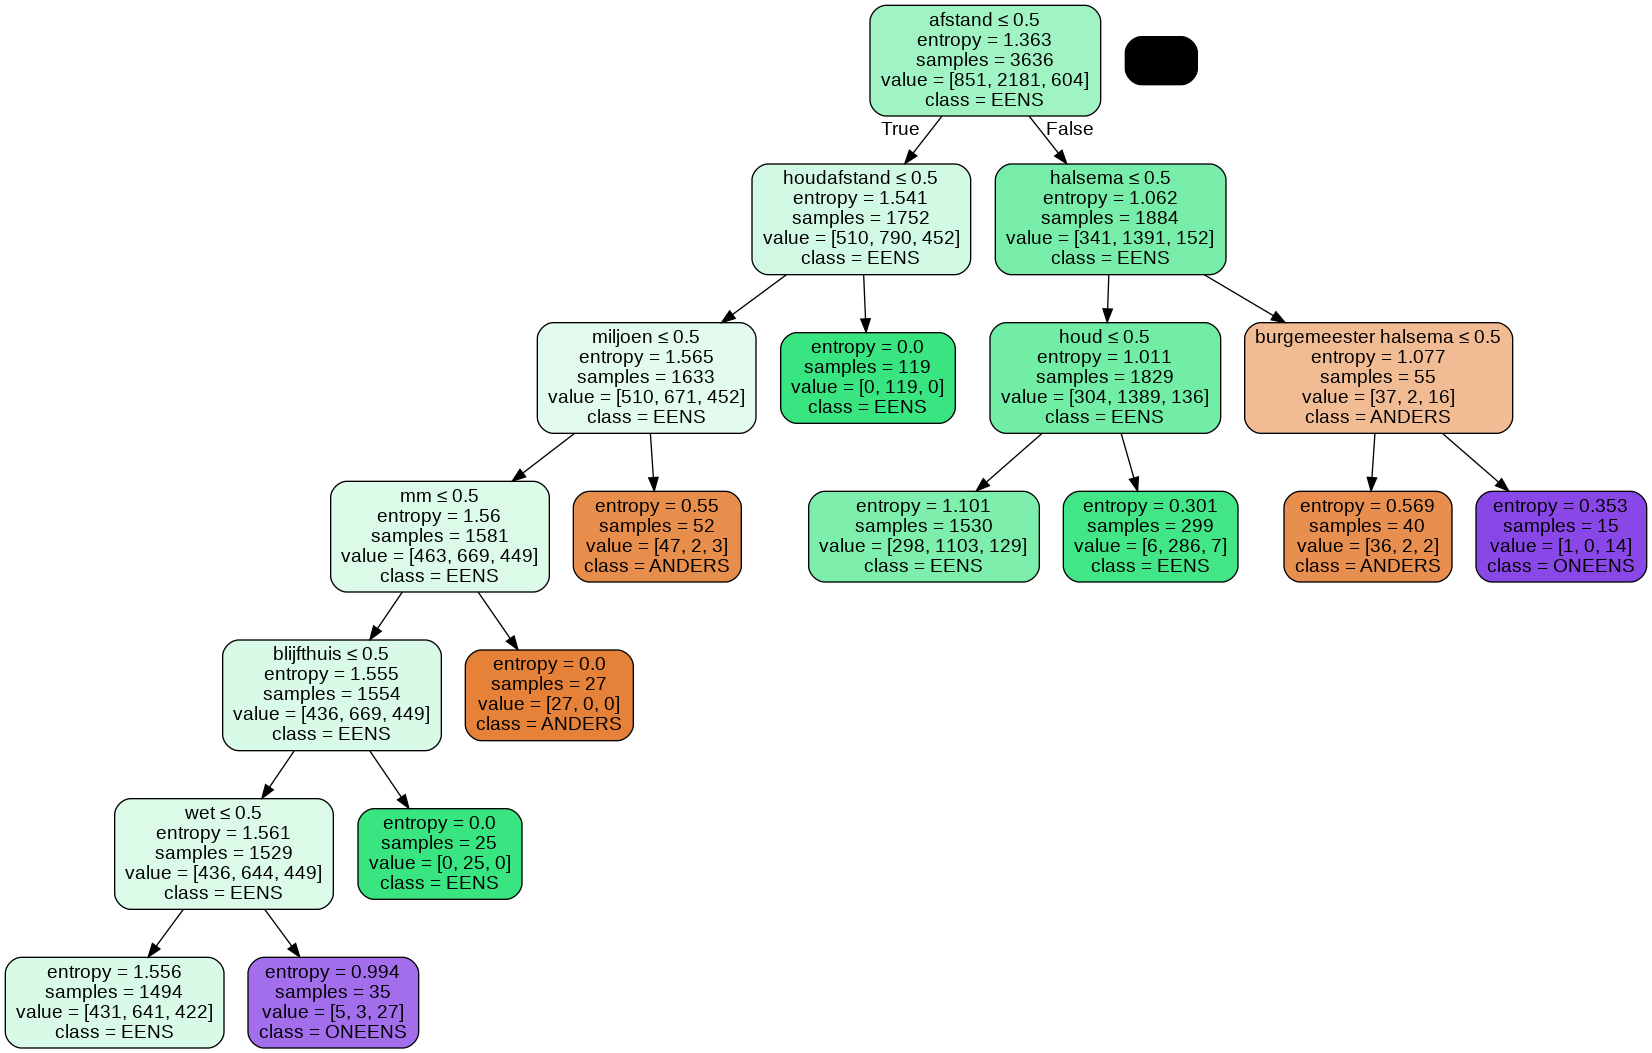

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import graphviz

dot_data = export_graphviz(dt_clf, 
                           feature_names=tokenizer.get_feature_names(),
                           filled=True, 
                           rounded=True,
                           special_characters=True, class_names=dt_clf.classes_)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Question**: What feature is tested first? Do the features that are tested by this decision tree correspond with your intuition? 

**<font color=blue>afstand</font>**

### 4.2. Logistic regression

__Logistic regression__ models the probability $P(y|x;w)$ that a tweet, $x$, falls into the specific category or not ($y \in \{0,1\}$). In the case of our three categories, it uses a different vector of weights $w$ for every category (ANDERS, EENS, ONEENS). If $P(y=1|x;w)$ > 0.5, then the feature vector falls into the category corresponding to the weight vector $w$.

The following are the building blocks of a logistic regression classifier:

- Bag-of-Words vector
$$x = [x_1,x_2,...,x_{|V|}], x \in \mathbb{R}^{|V|} $$

- Parameter vector (one per class)
$$w = [w_{1},w_{2},...,w_{|V|}], w \in \mathbb{R}^{|V|} $$

- Linear scoring function $f$
$$f_w{(x)} = w_1x_1+w_2x_2+...+w_{|V|}x_{|V|} = w^Tx \in \mathbb{R}$$

- Sigmoid Function
$$\sigma(z) = \frac{1}{1+e^{-z}} \in [0,1]$$

As $z$ goes from $-\infty$ to $\infty$, $\sigma(z)$ goes from 0 to 1

<img src="https://www.dropbox.com/s/tt0q4ktc4na12yr/sigmoid.png?dl=1">

$$P(y=\text{1}|x;w) = \sigma(f_w(x)) = \frac{1}{1+e^{-(w^Tx)}}$$

$$log P(y=\text{1}|x;w)= - log(1+e^{{-(w^Tx)}}) $$


**Learning** is formulated as maximizing the likelihood of the correct answer or minimizing the negative log of the likelihood (probability) of the correct answer


$$ \underset{\text{w}\in R^{|V|}}{min}\sum_{i}^{N} log(1+e^{{-(w^Tx)}}) $$

If $\sigma(f(x))$ > 0.5 then feature vector x is predicted to belong to category y. 

In our setting of stance detection with multiple output categories (>2), logistic regression is trained for every label separately (meaning a different weight vector is trained for each category), and then the most probable category is selected.

**Question**:
- Import `LogisticRegression` from the `sklearn.linear_model` module ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).
- Create a new `LogisticRegression` object named `lr_clf`. **Again, please set the `random_state` argument equal to the SEED variable we defined earlier.**
- Fit the model on our training data.
- The feature-weights $w$ that are learned by the classifier, and the tokens they correspond to, can be accessed using `lr_clf.coef_`. Weights provide insights into important features. Which tokens are weighted strongly for classes EENS and ONEENS? Print the ten most significant tokens for each class by sorting the lists of tokens according to weight. Using numpy's [argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) method can be convenient here. Remember that the dictionary `inverted_vocab` (which you defined earlier) can be used translate token id's (which are used as features in the model) to tokens. 

**Question**: What is the weight of token `zegneetegenanderhalvemeter` for each of the three classes? Do the weights correspond with what you would expect intuitively? 

**<font color=blue><<< INSERT ANSWER HERE >>></font>**

In [ ]:
# import Logistic regression classifier and fit on your data
# lr_clf = ... (random_state=SEED)

# agree_features = ... # list of 10 token ids, ordered from highest to lower weight assigned by the model for the "EENS" class
# disagree_features = ... # list of 10 token ids, ordered from highest to lower weight assigned by the model for the "ONEENS" class

# agree_tokens = ... # list of 10 tokens, ordered from highest to lower weight assigned by the model for the "EENS" class
# disagree_tokens = ... # list of 10 tokens, ordered from highest to lower weight assigned by the model for the "ONEENS" class

############### for student ################
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42).fit(X,y)


agree = lr_clf.coef_[1]
disagree = lr_clf.coef_[2]
# print(agree)

# print(type(agree))
agree_features = agree.argsort()[::-1][:10] # list of 10 token ids, ordered from highest to lower weight assigned by the model for the "EENS" class
disagree_features = disagree.argsort()[::-1][:10] # list of 10 token ids, ordered from highest to lower weight assigned by the model for the "ONEENS" class
# print(inverted_vocab)

agree1=np.vectorize(inverted_vocab.get)(agree_features)
disagree1=np.vectorize(inverted_vocab.get)(disagree_features)
# print(agree1)
# print(disagree1)
agree_tokens =  agree1# list of 10 tokens, ordered from highest to lower weight assigned by the model for the "EENS" class
disagree_tokens = disagree1 # list of 10 tokens, ordered from highest to lower weight assigned by the model for the "ONEENS" class

# print(disagree_features[0])
# # print(disagree_tokens[0])










############################################


In [ ]:
## evaluation
## DON'T CHANGE THIS CELL IN ANY WAY

assert type(lr_clf) == sklearn.linear_model._logistic.LogisticRegression, "wrong classifier"
assert abs(lr_clf.coef_[0][2] - 0.3240) <= 1e-4, "Have you fit the classifier? Have you set the seed? Are you working in colab?"
assert agree_features[0] == 1985, 'use np.argsort to get list of agree token ids'
assert disagree_features[0] == 4523, 'use np.argsort to get list of disagree token ids'
assert agree_tokens[0] == 'houdafstand', 'use the inverted vocabulary to map ids to tokens'
assert disagree_tokens[0] == 'waanzin' , 'use the inverted vocabulary to map ids to tokens'

print("well done")

well done


### 4.3. Naive Bayes Classification

__Naive Bayes classifiers__ are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of __conditional probabilities__ of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label $y$ given some observed features, which we can write as $P(y~|~{\rm x})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(y~|~{\rm x}) = \frac{P({\rm x}~|~y)P(y)}{P({\rm x})}
$$

If we are trying to decide between three stances—then one way to make this decision is compute the posterior probabilities for each label:

$$
\underset{y \in \{\text{EENS}, \text{ONEENS}, \text{ANDERS}\}}{\text{argmax}} P(y|x)
$$

This requires us to model the probability $P({\rm x}~|~y)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label (i.e., the independence of co-occuring words), we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. Different types of naive Bayes classifiers rest on different naive assumptions about the data. 

A Bernoulli Naive Bayes classifier is designed for binary/boolean features and this classifier is suitable for discrete data. The underlying assumption made by this model is that the data is distributed according to multivariate Bernoulli distributions. See [Bernoulli Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes) for more information. 

**Question**:
- Import the `BernoulliNB` from the `sklearn.naive_bayes` module. [See documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)
- Create a new BernoulliNB object named `nb_clf`
- Fit the model on the data
- Which are the most significant tokens for stances EENS and ONEENS for this classifier? One way to measure the importance of features, is to compute the ratio of their conditional probabilities for each label. You can access the log of the conditional probabilities learned for each feature and each class using `nb_clf.feature_log_prob_`. Implement the formula below to assess which features lead to the highest difference (important for the EENS class) and which lead to the lowest/most negative (important for the ONEENS class). Again, translate these feature indices to the tokens they correspond to using the `inverted_vocab`.

$$\frac{P({\rm x}~|~y = \text{EENS})}{P({\rm x}~|~y = \text{ONEENS})}$$

$$ log(P({\rm x}~|~y = \text{EENS})) - log(P({\rm x}~|~y = \text{ONEENS})) $$

In [ ]:
# import Bernoulli NB classifier and fit on your data
# nb_clf = ... 

# agree_features = ... # list of 10 token ids, ordered from highest to lower importance assigned by the model for the "AGREE" class
# disagree_features = ... # list of 10 token ids, ordered from highest to lower importance assigned by the model for the "DISAGREE" class

# agree_tokens = ... # list of 10 tokens, ordered from highest to lower importance assigned by the model for the "AGREE" class
# disagree_tokens = ... # list of 10 tokens, ordered from highest to lower importance assigned by the model for the "DISAGREE" class

############### for student ################
from sklearn.naive_bayes import BernoulliNB

nb_clf = BernoulliNB()
nb_clf.fit(X,y)
formula = np.argsort((nb_clf.feature_log_prob_[1])-(nb_clf.feature_log_prob_[2]))[::-1]

agree_features = formula[:10]
disagree_features = formula[-10:][::-1]

# agree_tokens

agree_tokens =  []# list of 10 token ids, ordered from highest to lower importance assigned by the model for the "AGREE" class
disagree_tokens = [] # list of 10 token ids, ordered from highest to lower importance assigned by the model for the "DISAGREE" class

for features1 in agree_features:
  agree_tokens.append(inverted_vocab[features1])

for features2 in disagree_features:
  disagree_tokens.append(inverted_vocab[features2])
# nb_clf.feature_log_prob_
# # agree_tokens = ... # list of 10 tokens, ordered from highest to lower importance assigned by the model for the "AGREE" class
# # disagree_tokens 
# agree_features[9]






############################################

In [ ]:
## evaluation
## DON'T CHANGE THIS CELL IN ANY WAY

assert type(nb_clf) == sklearn.naive_bayes.BernoulliNB, "Wrong classifier"
assert abs(nb_clf.feature_log_prob_[0][2] - (-4.6693)) <= 1e-4, "Have you fit the classifier? Have you set the seed? Are you working in colab?"
assert agree_features[0] == 1985, 'use np.argsort to get list of agree token ids'
assert disagree_features[0] == 1068, 'use np.argsort to get list of disagree token ids'
assert agree_tokens[0] == 'houdafstand', 'use the inverted vocabulary to map ids to tokens'
assert disagree_tokens[0] == 'dictatuur' , 'use the inverted vocabulary to map ids to tokens'

print("well done")

well done


## 5. Evaluation

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the `predict()` method for classifiers. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts (*system output labels*). We will then compare the model's predicted values to the known ground-truth values (*gold standard labels*) and evaluate how far off the model is through some metrics.

Metrics: **Accuracy, Precision, Recall, F$_1$**

<img src="https://www.dropbox.com/s/xhjwoqd6tnxxaeb/bowman_metrics.png?dl=1" width=800px>

$$F_1 = \frac{2 * Precision * Recall}{Precision + Recall}$$

Now we import all the metrics mentioned above from the `sklearn.metrics` module 

In [ ]:
from sklearn.metrics import accuracy_score   
from sklearn.metrics import precision_score   
from sklearn.metrics import recall_score   
from sklearn.metrics import f1_score   
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Question**: Define a new LogisticRegressionClassifier object (with inverse of regularization strength of 10) and fit it on the data, as before. **Don't forget to set the `random_state` argument to SEED again**. Then, evaluate it on the same data it was trained on by using `clf.predict()`. Use the accuracy score as an evaluation metric. Also use `classification_report` to print the performance as assessed by other metrics (precision, recall, f1-score).

In [ ]:
# import Logistic regression classifier and fit on your data
# clf = ... (random_state=SEED)
# acc_score = ...

############### for student ################
from sklearn.linear_model import LogisticRegression
# cle=LogisticRegression()
clf = LogisticRegression(C=10,random_state=42).fit(X,y)
y_pred = clf.predict(X)
acc_score = accuracy_score(y, y_pred)







############################################

In [ ]:
## evaluation
## DON'T CHANGE THIS CELL IN ANY WAY

assert type(clf) == sklearn.linear_model._logistic.LogisticRegression, "Wrong model"
assert clf.C==10.0, "Set inverse of regularization strength to 10.0"
assert abs(acc_score-0.9945) <= 1e-4, 'Accuracy score is not correct. Have you set the seed? Are you working in colab?'

print('well done')

well done


Issue: the training error is a __biased__ estimate of the generalization error. As the model has seen the training data before, it will be better at predicting the labels for the dataset it was fitted on than at predicting labels for unseen data. By only evaluating the model on data it has already seen during the training stage, we won't get an accurate idea of how well it would perform on unseen data. 

Solution: Divide ${\cal D}$ into disjoint parts called training and test sets (a common choice is using 80% for training and 20% for test).
- Use the training set for fitting the model;
- Use the test set for evaluation only, thereby yielding an unbiased estimate.

This could be done by hand, but it is more convenient to use the `train_test_split` utility function from `sklearn.model_selection`.

**Question**:
- import the `train_test_split` function from the `sklearn.model_selection` module
- Create a `X_train`, `X_val`, `y_train` and `y_val` set from the data collection, using 80% for training and 20% for test (see [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). **Please do not forget to set the `random_state` argument equal to SEED**.
- Print the shapes of the new arrays

In [ ]:
## import train/test split from sklearn
## split X,y into test and train (random_state=SEED)
## X_train, X_val, y_train, y_val = ...

############### for student ################
from sklearn.model_selection import train_test_split



X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)







############################################

(2908, 5000)


In [ ]:
## evaluation
## DON'T CHANGE THIS CELL IN ANY WAY

assert X_train.shape == (2908, 5000), "Train shape incorrect, have you performed an 80/20 split?"
assert y_train.shape == (2908,), "Train shape incorrect, have you performed an 80/20 split?"
assert X_val.shape == (728, 5000), "Val shape incorrect, have you performed an 80/20 split?"
assert y_val.shape == (728,), "Val shape incorrect, have you performed an 80/20 split?"

print('well done')

well done


**Question**: Now find out how well we do on held-out data. Train a Logistic regression classifier on the training set, again using an inverse regularization strength of 10 and setting the `random_state` equal to SEED. Evaluate its performance on both train and test data by using `clf.predict` and calculating the accuracy score.

In [ ]:
# create LogisticRegression classifier (random_state=SEED)
# fit it on X_train, y_train
# evaluate on X_val, y_val

# train_acc_score = ...
# val_acc_score = ...

############### for student ################


from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=10,random_state=42).fit(X_train,y_train)
y_predx = clf.predict(X_train)
y_predy = clf.predict(X_val)

train_acc_score = accuracy_score(y_train, y_predx)
val_acc_score = accuracy_score(y_val, y_predy)


# print(X_train)
# print(y_train)




############################################

In [ ]:
## evaluation
## DON'T CHANGE THIS CELL IN ANY WAY

assert type(clf) == sklearn.linear_model._logistic.LogisticRegression, "Wrong model"
assert clf.C==10.0, "set strength to 10.0"
assert abs(train_acc_score-0.9952) <= 1e-3 , "train acc is not correct, random state (both in clf and in train-val split)? strength?"
assert abs(val_acc_score-0.6593) <= 1e-3 , "valid acc is not correct, random state (both in clf and in train-val split)? strength?"

print('well done')

well done


We see a big drop in accuracy on held-out data, meaning we overfit the training data. 

We can go back and revise our approach (e.g. by playing around with the different parameters for the [logistic regression classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model) and re-fitting on the training data, and then see how well we do on the held-out test data.

By doing this, however, we'll be fitting to the test data. At some point, we'll want to evaluate on completely new data, which was the purpose of the test set in the first place! For this reason, the test split should be used as sparingly as possible, and we should hold back from using the test split to make any decisions about our model. Instead, we should split off another set of data which can be used in the iterative process of finding the best model. This set of data is called the validation set. We will address this approach in further detail in the next section. 
<img src="https://www.kdnuggets.com/wp-content/uploads/train_test_split.jpg" width=500px>

## 6. Regularization

### 6.1. Bias-variance tradeoff

When models have enough flexibility to nearly perfectly account for the fine features in the data, they 
can learn to very accurately describe the training data. The model's precise form can become more reflective of the particular noise properties of the training data (which will be different in held-out data) than the intrinsic properties of whatever process generated that data (i.e., the actual 'signal' in the data, which will be present in held-out data as well).

Such a model is said to __*overfit*__ the data: that is, it has so much model flexibility that the model ends up accounting for random errors as well as the underlying data distribution; another way of saying this is that the model has high __*variance*__, and it may poorly perform on unseen data.

A model is said to __*underfit*__ the data when it does not have enough model flexibility to suitably account for all the features in the data; another way of saying this is that the model has high __*bias*__.

Overfitting can be countered in many ways.  In this tutorial we focus on the technique of __*regularization*__ of a logistic regression classifier.
Learning in Logistic Regression is formulated as the optimization of

$$ \underbrace{\underset{\text{w}\in R^{|V|}}{min}\sum_{i}^{N} log(1+e^{{-(\sigma(w^Tx))}})}_{Loss}$$

When a linear model overfits, weights tend to become very large. One way to counter this, is to penalize large weights by adding an additional component to the loss function called a regularization.

$$ \underbrace{\underset{\text{w}\in R^{|V|}}{min}\sum_{i}^{N} log(1+e^{{-(\sigma(w^Tx))}})}_{Loss} + \underbrace{\frac{1}{C} ||w||^2}_{Regularization}$$

**Question**: What is the effect of the `C` parameter on the generalization performance? Evaluate in terms of accuracy, as well as the distribution of the weight coefficients. You can visualize the distribution by making a histogram (see, for example, the `distplot` function from the [Seaborn](https://seaborn.pydata.org/generated/seaborn.distplot.html) library).

**<font color=blue><<< INSERT ANSWER HERE >>></font>**

In [ ]:
# import logistic regression 
# visualize coef distribution for different values of C (random_state=SEED)
# evaluate acc on each value

############### for student ################

# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression


# clf001 = LogisticRegression(C=0.001,random_state=42)
# clf001.fit(X_train, y_train)
# y_train_pred = clf001.predict(X_train)
# y_val_pred = clf001.predict(X_val)
# train_acc_score = accuracy_score(y_train, y_train_pred)
# val_acc_score = accuracy_score(y_val, y_val_pred)
# print(train_acc_score)
# print(val_acc_score)
# coef001 = clf001.coef_
clf1 = LogisticRegression(random_state=42)
clf1.fit(X_train, y_train)
y_train_pred = clf1.predict(X_train)
y_val_pred = clf1.predict(X_val)
train_acc_score = accuracy_score(y_train, y_train_pred)
val_acc_score = accuracy_score(y_val, y_val_pred)
print(train_acc_score)
print(val_acc_score)
coef1 = clf1.coef_
clf10 = LogisticRegression(random_state=42, C=10)
clf10.fit(X_train, y_train)
y_train_pred = clf10.predict(X_train)
y_val_pred = clf10.predict(X_val)
train_acc_score = accuracy_score(y_train, y_train_pred)
val_acc_score = accuracy_score(y_val, y_val_pred)
print(train_acc_score)
print(val_acc_score)
coef10 = clf10.coef_
clf100 = LogisticRegression(random_state=42, C=100)
clf100.fit(X_train, y_train)
y_train_pred = clf100.predict(X_train)
y_val_pred = clf100.predict(X_val)
train_acc_score = accuracy_score(y_train, y_train_pred)
val_acc_score = accuracy_score(y_val, y_val_pred)
print(train_acc_score)
print(val_acc_score)
coef100 = clf100.coef_
import matplotlib.pyplot as pltimport
seaborn as sns, numpy as np
plt.subplot(2,2,1)
ax = sns.distplot(coef001)
plt.subplot(2,2,2)
ax = sns.distplot(coef1)
plt.subplot(2,2,3)
ax = sns.distplot(coef10)
plt.subplot(2,2,4)
ax = sns.distplot(coef100)
plt.show()















############################################

SyntaxError: ignored

Fundamentally, the question of "the best model" is about finding a sweet spot in the tradeoff between *bias* and *variance*. This is called the **bias-variance tradeoff**.

- *Underfitting, High Bias*: the model is too simple and does not capture the true relation between X and Y.
- *Overfitting, High Variance*: the model is too specific to the training set and does not generalize.

Below, we plot the training accuracy and validation accuracy for different values of the parameter C. Plots like this can help you decide which value of C (or other parameters) leads to the best performance of the model on unseen data. 

**Question**: Which value of C (from the range that is tried below) seems to be the best choice? Describe how you came to this conclusion.

**<font color=blue><<< INSERT ANSWER HERE >>></font>**

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier 

# Evaluate parameter range in CV
param_range = [0.0001,0.001,0.01,0.1,1,10,100]
param_name = "C"
clf = LogisticRegression()

train_scores, test_scores = validation_curve(
    clf, X, y, 
    param_name=param_name, 
    param_range=param_range, cv=2, n_jobs=-1, scoring="accuracy")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot parameter VS estimated error
plt.figure(figsize=(8,6))
plt.xlabel(param_name)
plt.ylabel("score")
plt.xscale("log")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, train_scores_mean, color="blue", label="Training acc.")
plt.fill_between(param_range, 
                 train_scores_mean + train_scores_std,
                 train_scores_mean - train_scores_std,
                 alpha=0.2, color="blue")
plt.plot(param_range, test_scores_mean, color="red", label="CV acc.")
plt.fill_between(param_range, 
                 test_scores_mean + test_scores_std,
                 test_scores_mean - test_scores_std, 
                 alpha=0.2, color="red")
plt.legend(loc="best")

print(test_scores)

<table>
<tr><td><p style="clear: both;"> <img src="https://www.dropbox.com/s/mpmrstr7k5z0lku/jakevdp_biasvariance.png?dl=1" width=400px></td><td> <img src="https://www.dropbox.com/s/4dyuvb3b6swwcgy/louppe_bv.png?dl=1" width=400px> <td>
</tr>
</table>

### 6.2. Cross-validation

When evaluating different settings (___hyperparameters___) for estimators, such as the $C$ setting that must be manually set for a logistic regression, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can ___leak___ into the model and evaluation metrics no longer report on generalization performance. To solve this problem, the data not used for training is split into a ___validation set___ and the actual ___test set___. Training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called __cross-validation__ (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into $k$ smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:
- A model is trained using all but one of the folds as training data;
- The resulting model is evaluated on the remaining part of the data (i.e., it is used as a validation set to compute a performance measure such as accuracy).
- The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. 

This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

<img src="https://www.dropbox.com/s/132oue6yj29cml3/jakevdp_cross.png?dl=1" width=600px>

**Question**: What is the average accuracy over five folds of training, for a logistic regression classifier (with inverse regularization strength set to 10 and the `random_state` argument set to SEED)? Use the `cross_val_score` function from the `sklearn.model_selection` module. 

In [ ]:
# import cross_val_score
# clf = ...
# avg_acc = ...

############### for student ################









############################################

In [ ]:
## evaluation
## DON'T CHANGE THIS CELL IN ANY WAY
assert type(clf) == sklearn.linear_model._logistic.LogisticRegression, "wrong model"
assert clf.C==10.0, "set strength to 10.0"
assert abs(avg_acc-0.652) <=1e-3, 'cross val score is not correct, make sure to set random_state=SEED and use 5 folds'

print('well done')

<img src="https://www.dropbox.com/s/6qqluvighbqub27/epfl_traintest.PNG?dl=1" width=600px>

__Summary__: Beware of bias when you estimate model performance:
* Training score is often an optimistic estimate of the true performance;
* __The same data should not be used both for training and evaluation.__

\\\You will now attempt to train a model which performs well on the train set and generalizes well to the test set. 

A held-out collection of tweets is stored in `test.csv`, without the correct labels. This will serve as our test set. Note that this means you can use the entire data set, now stored in `data`, to train and validate your models (meaning you don't have to split off a test set, as we did earlier, just perform cross validation). Try to maximize your model's performance on the cross-validation splits without evaluating on the test set. Answer the questions below and let them guide you to the best model. 

Once you have selected and trained a decent model, you can use it to make predictions on the test set. In the second cell below, we show an example of how to do this and how to prepare a submission for the Kaggle competition. 

**Question**:
1. Experiment with other measures for regularization of the models  discussed during the session
    - What is `l1` and `l2` regularization and what is the effect on the weights when changing the `penalty` parameter of the LogisticRegression object to `l1`?
    - What is the effect of the `max_features` parameter of the tokenizer?
**<font color=blue><<< INSERT ANSWER HERE >>></font>**
2. Which of the models performs best on the validation data? Discover and import other models from the sklearn package ([KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), ...)
**<font color=blue><<< INSERT ANSWER HERE >>></font>**
3. Can you think of ways to combine predictions by different classifiers? 
**<font color=blue><<< INSERT ANSWER HERE >>></font>**
4. You are free to think of other ways to improve your model as well (feature engineering, modeling, optimization, etc.). Please motivate any decisions you made to find the best model and approaches you tried. 
**<font color=blue><<< INSERT ANSWER HERE >>></font>**

In [ ]:
# import models from the sklearn library
# experiment with other regularization measures
# discover other models and try them out
# try to combine predictions by different classifiers
# use cross-validation to select regularization parameters and compare models

############### for student ################






























############################################

In [ ]:
# Make predictions for the test set and prepare submission for Kaggle competition

test_path = "test.csv"

test_data = pd.read_csv(test_path)

X_test = tokenizer.transform(test_data['text']) # transform test entries to feature representation
                                                # make sure you have trained the tokenizer using all train data

clf = LogisticRegression() # just a placeholder classifier, replace this with your best model and fit on all training data 
clf.fit(X_train, y_train)

y_test = clf.predict(X_test) # make predictions for the test data
                             # alternative: use predict_proba() to return probabilities for each class instead of labels and manually select most likely label from this information
                             # make sure you have trained the classifier using all train data and optimized its parameters

test_data['label'] = y_test 
test_data[['id','label']].to_csv('submission.csv',header=['id','label'], index = False) # kaggle submission is CSV containing two columns: entry ID and predicted label
                                                                                        # labels are compared to ground truth in Kaggle, yielding a test score for your model

## 7. Bonus: Kaggle competition 

- Congratulations! You have made your first stance detection classifier and predicted the stance towards social distancing for a collection of new tweets. The ground truth for the held-out test data is stored on the online data science platform Kaggle. 
- We have already submitted the example submission formed above as a baseline in the competition. Simple improvements over the default settings should already result in higher scores than the baseline. 
- What is the performance of your model? How do you rank among your peers?
- Now try to improve your model by adding new models, vectorizers, extra features, additional data... (talk to us or go looking online to get ideas).
- Think of ways to include knowledge from external sources in your model. 
- Submit your predictions to the in-class [Kaggle Competition](https://www.kaggle.com/t/cf65e7a323be407ba49f3bae77a770dc). This competition is private and will be removed. We will keep it open up until the deadline for submitting this notebook (i.e., Tuesday March 15 at 11:59PM).
- Feel free to comment on any successful submissions, or provide insights into which methods worked better than others. However, this remains optional.

__Keep in mind, the limit of submissions is set at 10 per day!__ 

## Acknowledgment


If you received help or feedback from fellow students, please acknowledge that here. We count on your academic honesty:

**<font color=blue><<< INSERT ANSWER HERE >>></font>**

## Data
```
Erik Tjong Kim Sang, Marijn Schraagen, Shihan Wang and Mehdi Dastani, 
Transfer Learning for Stance Analysis in COVID-19 Tweets. 
CLIN 2021.
```
[https://ifarm.nl/erikt/papers/clin-20210419.pdf](https://ifarm.nl/erikt/papers/clin-20210419.pdf)

## Tutorial based on

- [NYU Course - Introduction to Natural Language Understanding - Samuel Bowman](https://docs.google.com/document/d/1kXhxA4iit2fhAJJGOb32bb151cKLJtW8xWuyMVwqD6s/edit)
- [Introduction to Scikit Learn - Gilles Louppe](https://github.com/glouppe/tutorials-scikit-learn)
- [EPFL Introduction to Deep Learning - François Fleuret](https://fleuret.org/ee559/)
- [Machine learning for NLP - Benjamin Muller](https://nlp-ensae.github.io/files/NLP-ENSAE-2021-lecture-1.pdf)